In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


공공데이터 추가 활용 가능(공공데이터포털, 서울 열린데이터 광장, 농식품공공데이터 등 정부에서 보유하고 있는 데이터 활용 가능)

타 데이터를 활용하신 경우 반드시 보고서에 출처를 작성하시기 바랍니다.

본 데이터는 도매 물류센터에서 소매업자와 이루어진 거래 내역을 담고 있습니다.

물류센터는 유통산업발전법에 따라 설립된 기관으로, 전국 허가 구역 내에서 지자체가 운영하며, 소상공인들은 조합원으로 가입해 저마진으로 상품을 구매할 수 있습니다.

제공된 데이터는 조합원 소매상과 비조합원 소매상의 거래 내역을 모두 포함하고 있습니다.
대부분의 거래는 조합원 소매상이 주를 이루지만, 일부 비조합원과의 거래도 포함되어 있습니다.
물류센터는 일반 소비자에게 판매하지 않으며, 낮은 마진으로 거의 원가에 상품을 판매합니다.

또한, 배송 시스템이 갖춰져 있지 않아 고객이 직접 방문해 물건을 픽업하는 방식으로 운영되고 있으며, 현금 결제만 가능합니다.

이러한 운영 방식을 염두에 두고 데이터를 분석해 주시기 바랍니다.

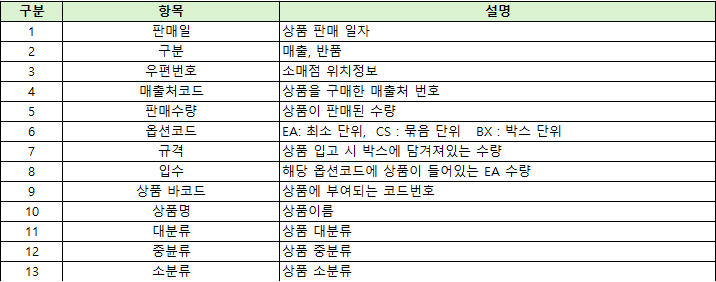

In [ ]:
!pip install openpyxl

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data1 = pd.read_excel('/content/drive/MyDrive/2024-2 컨퍼런스/라면예측/(1 데이터) 유통데이터 활용 경진대회 배포용.xlsx', sheet_name=None)
data1 = pd.concat(data1.values(), ignore_index=True)

In [ ]:
data2 = pd.read_excel('/content/drive/MyDrive/2024-2 컨퍼런스/라면예측/(2 데이터) 유통데이터 활용 경진대회 배포용.xlsx', sheet_name = None)
data2 = pd.concat(data2.values(), ignore_index=True)

In [ ]:
data1

,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
0,2021-01-04,매출,37684,98,1,BX,3입,1,1.701008e+12,화장지 잘풀리는집 2겹<30롤*3>,비식품,화장지류,NaN
1,2021-01-04,매출,37544,95,1,BX,1입,4,1.880104e+13,맥심모카 210T<*4>XXX,식품,"커피,차류",NaN
2,2021-01-04,매출,37542,8,2,BX,12입,12,1.880104e+13,사조]해표식용유<1.8L>,식품,가공식품류,식용유
3,2021-01-04,매출,37542,8,1,BX,3팩*8,1,1.880475e+13,모나리자]콤비280매,비식품,화장지류,NaN
4,2021-01-04,매출,37542,8,3,BX,6입,6,8.801043e+12,농심]안성탕면컵<6入>,식품,"라면,통조림,상온즉석",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034460,2023-12-29,반품,37655,4,4,EA,1入,1,2.838022e+12,말통]공XXX,비식품,잡화,업소(잡화)
1034461,2023-12-29,반품,37791,2044,1,EA,15입,1,8.801045e+12,오뚜기]양념 돼지불고기<240g>,식품,가공식품류,"설탕,소금,조리료류"
1034462,2023-12-29,반품,37791,2044,1,EA,15입,1,8.801045e+12,오뚜기]소스 스테이크<290g>,식품,가공식품류,"설탕,소금,조리료류"
1034463,2023-12-29,반품,37791,2044,4,EA,40입,1,8.801045e+12,오뚜기]스프옥수수<80g>,식품,가공식품류,분말류등


In [ ]:
반품 = data1[data1['구분']== '반품' ]

In [ ]:
data1[data1['판매일']=='2023-01-03']

,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류
699767,2023-01-03,매출,37899,100,1,BX,12입,12,1.880101e+13,햇반]밥<200g*4>,식품,"라면,통조림,상온즉석",NaN
699768,2023-01-03,매출,37571,51,1,BX,6입,6,8.801043e+12,농심]새우깡대<400g>,식품,"과자,씨리얼,초코릿,빵류",NaN
699769,2023-01-03,매출,37571,51,1,BX,16입,16,8.801043e+12,농심]새우탕큰사발<115g>,식품,"라면,통조림,상온즉석",NaN
699770,2023-01-03,매출,37571,51,1,BX,20입,20,8.801043e+12,농심]생생우동봉지<253g>,식품,"라면,통조림,상온즉석",NaN
699771,2023-01-03,매출,37571,51,1,BX,16입,16,8.801043e+12,농심]튀김우동큰사발<111g>,식품,"라면,통조림,상온즉석",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700865,2023-01-03,반품,37912,2169,1,BX,24입,24,8.801043e+12,농심]육개장사발<86g>,식품,"라면,통조림,상온즉석",NaN
700866,2023-01-03,반품,38039,45,1,BX,4입,1,5.880105e+13,엘지]테크클린화이트진드기리필<3kg>,비식품,세제류,세탁
700867,2023-01-03,반품,37793,29,2,EA,12입,1,8.801037e+12,동서]구기자차<40T>XXX,식품,"커피,차류",NaN
700868,2023-01-03,반품,37793,29,1,EA,1입,1,8.801037e+12,동서]카누마일드스위트미니<100T>348g,식품,"커피,차류",NaN


In [ ]:
data2

,판매일,구분,우편번호,매출처코드,판매수량,옵션코드,규격,입수,상품 바코드(대한상의),상품명,대분류,중분류,소분류,Unnamed: 13
0,2021-01-31,매출,50868,202441,2,BX,10,10,7.880106e+13,(롯데칠성)비타파워100ml*10,"음료,차류",음료,기능성음료,NaN
1,2021-01-31,매출,51205,202520,1,BX,16(단종),16,8.880106e+13,(롯데제과)몽쉘크림케이크6입192g,빵.케익.과자류,빵.케익류,과자빵류,NaN
2,2021-01-31,매출,51174,200044,1,BX,24,24,1.880105e+13,(동원)꽁치300g,통조림류,기타병·통조림,기타병·통조림,NaN
3,2021-01-31,매출,51174,200044,1,BX,12,12,1.880105e+13,(오뚜기)열라면종이(용기)105g,면류.라면류,라면류,용기라면,NaN
4,2021-01-31,매출,51170,200046,1,BX,10/20,20,1.880107e+13,(삼양식품)사또밥67g,빵.케익.과자류,과자류,스낵류,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593145,2023-12-30,반품,51377,200068,10,EA,1,1,8.804341e+12,크린공기(동양)150,기타잡화,기타잡화,기타잡화,NaN
593146,2023-12-30,반품,51377,200068,10,EA,NaN,1,8.809014e+12,예식장갑,생활잡화,기타생활잡화,기타생활잡화,NaN
593147,2023-12-30,반품,51377,200068,12,EA,48/24,1,8.801046e+12,(애경)2080오리지날칫솔1입(탄력모),일상용품,구강용품,치솔,NaN
593148,2023-12-30,반품,51402,200002,1,EA,4,1,8.801034e+12,(정식품)베지밀5060시니어두유검은콩190ml*16,유제품류,우유.음용류,NaN,NaN


예측해야 할것: 1데이터의 경우 중분류 -라면, 통조림, 상온즉석

2데이터의 경우 대분류 - 면류, 라면류

In [ ]:
data2_ramen = data2[data2['대분류'].isin(['면류.라면류'])]

data2_ramen = data2_ramen[~(data2_ramen['구분'] == '반품')]

# 필터링된 데이터 확인
print(data2_ramen)

              판매일  구분   우편번호   매출처코드  판매수량 옵션코드  규격  입수  상품 바코드(대한상의)  \
3      2021-01-31  매출  51174  200044     1   BX  12  12  1.880105e+13   
9      2021-01-31  매출  51163  201573     2   BX  30  30  8.803060e+12   
18     2021-01-31  매출  50877  200205     1   BX  30  30  8.803060e+12   
19     2021-01-31  매출  50870  200195     2   BX  12  12  1.880105e+13   
21     2021-01-31  매출  50868  202441     1   BX  12  12  1.880105e+13   
...           ...  ..    ...     ...   ...  ...  ..  ..           ...   
593036 2023-12-30  매출  51195  200186     1   EA   1   1  8.801043e+12   
593055 2023-12-30  매출  51218  200387     3   EA   1   1  8.801046e+12   
593061 2023-12-30  매출  51218  200387    10   EA  30   1  8.803060e+12   
593066 2023-12-30  매출  51263  201145     1   EA   1   1  8.801043e+12   
593067 2023-12-30  매출  51263  201145     1   EA   1   1  8.801043e+12   

                       상품명     대분류  중분류   소분류  Unnamed: 13  
3       (오뚜기)열라면종이(용기)105g  면류.라면류  라면류  용기라면          NaN  
9

# Weekly SALE

In [ ]:
data2_ramen['판매일'] = pd.to_datetime(data2_ramen['판매일'])

weekly_sales = data2_ramen.groupby(data2_ramen['판매일'].dt.to_period('W'))['판매수량'].sum().reset_index()

weekly_sales['판매일'] = weekly_sales['판매일'].dt.start_time

# 결과 확인
print(weekly_sales)

          판매일  판매수량
0  2021-01-25  8808
1  2021-02-22  5743
2  2021-03-29  9228
3  2021-04-26  6941
4  2021-05-31  6970
..        ...   ...
58 2023-11-27  1746
59 2023-12-04  1554
60 2023-12-11  1698
61 2023-12-18  1640
62 2023-12-25  1502

[63 rows x 2 columns]


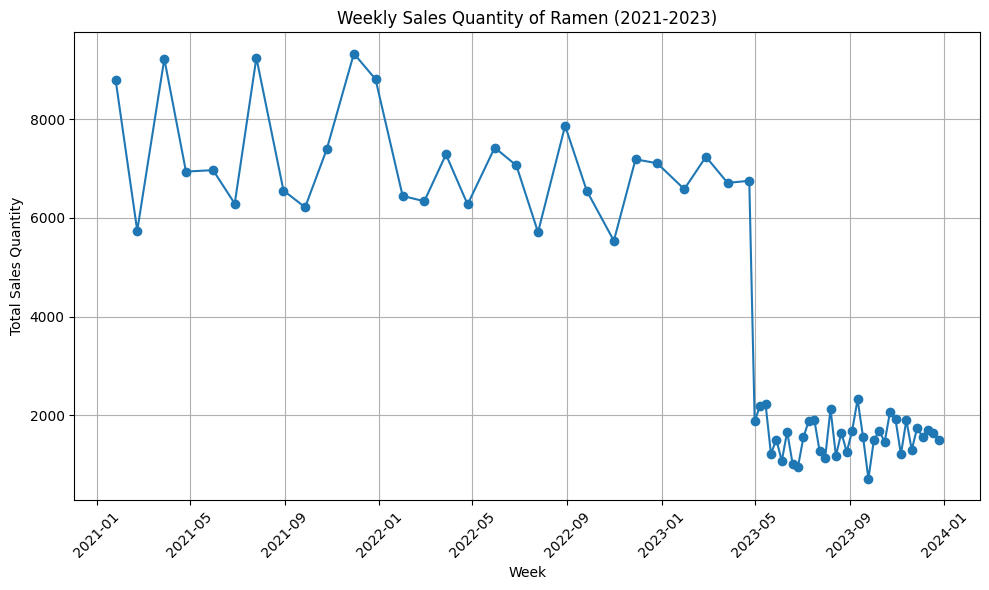

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(weekly_sales['판매일'], weekly_sales['판매수량'], marker='o')
plt.title('Weekly Sales Quantity of Ramen (2021-2023)')
plt.xlabel('Week')
plt.ylabel('Total Sales Quantity')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

그룹 2의 경우 23년 5월을 기점으로 엄청나게 감소...왜?

논문에서는 상품별 월별 수요량을 예측

In [ ]:
# 종류별 판매수량 합
# grouped_data = data1_ramen.groupby(['상품명'], as_index=False)['판매수량'].sum()
# grouped_data

,상품명,판매수량
0,감자면 큰사발<16>XXX,34
1,국산깐포도400g(24)XXX,240
2,국수 구포 소면.중면XXX,10
3,"국수 구포 콩,메밀,쌀 XXX",48
4,국수]구포 메밀<1.5kg>방울이표,8
...,...,...
735,햇반컵밥]치킨마요덮밥<232g>,217
736,햇반컵밥]콩나물국밥<270g>,85
737,햇반컵밥]황태국밥<170g>,347
738,황태미역국40g*5입,3


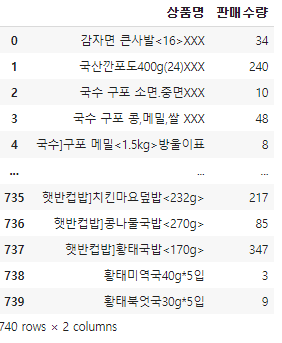

In [ ]:
grouped_data = data2_ramen.groupby(['상품명', '판매일'], as_index=False)['판매수량'].sum().reset_index()
grouped_data

,index,상품명,판매일,판매수량
0,0,(CJ)가쓰오우동930g(4인기획),2022-03-31,2
1,1,(CJ)가쓰오우동930g(4인기획),2022-05-31,1
2,2,(CJ)가쓰오우동930g(4인기획),2022-08-31,1
3,3,(CJ)햇당면500g,2022-09-30,2
4,4,(CJ)햇당면500g,2023-04-30,40
...,...,...,...,...
12601,12601,소표콩소면1000g,2023-01-31,3
12602,12602,즉석감자납작당면220g,2022-02-28,5
12603,12603,즉석감자납작당면220g,2022-04-30,5
12604,12604,즉석감자납작당면220g,2022-08-31,1


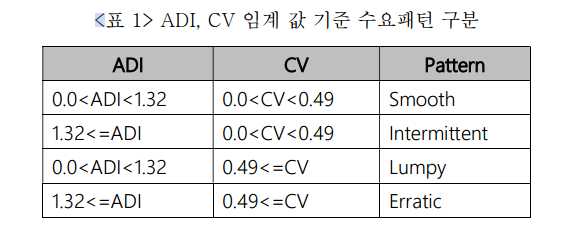

In [ ]:
data = grouped_data

# 열 이름에 공백이 있을 수 있으므로 이를 제거
data.columns = data.columns.str.strip()

# 판매일을 datetime 형식으로 변환
data['판매일'] = pd.to_datetime(data['판매일'])

# 상품명별로 그룹화
grouped = data.groupby('상품명')

# ADI 계산 함수
def calculate_adi(group):
    if len(group) < 2:
        return np.nan  # 판매 기록이 한 건 이하일 경우 ADI 계산 불가
    diff_days = group['판매일'].diff().dt.days.dropna()  # 판매일 간 차이 계산
    return diff_days.mean()

# CV 계산 함수
def calculate_cv(group):
    if group['판매수량'].mean() == 0:
        return np.nan  # 평균이 0일 경우 CV 계산 불가
    return group['판매수량'].std() / group['판매수량'].mean()

# 각 상품별 ADI와 CV 계산
adi_values = grouped.apply(calculate_adi).reset_index(name='ADI')
cv_values = grouped['판매수량'].agg(['mean', 'std']).reset_index()
cv_values['CV'] = cv_values['std'] / cv_values['mean']

# ADI와 CV 데이터 결합
adi_cv = pd.merge(adi_values, cv_values[['상품명', 'CV']], on='상품명')
adi_cv

<ipython-input-14-e7d3b51bdcbd>:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  adi_values = grouped.apply(calculate_adi).reset_index(name='ADI')


,상품명,ADI,CV
0,(CJ)가쓰오우동930g(4인기획),76.500000,0.433013
1,(CJ)햇당면500g,211.500000,1.551182
2,(농심)감자면멀티117g*5,36.551724,0.864090
3,(농심)김치사발면86g,8.924370,1.317054
4,(농심)김치사발면컵6입,5.135266,2.244457
...,...,...,...
253,(한울)구포국수(중면)1.4kg,33.181818,0.630077
254,소표국수(소면)900g,51.600000,1.311082
255,소표실라리안국수(소면)500g,291.000000,0.222222
256,소표콩소면1000g,67.777778,0.630718


In [ ]:
conditions = [
    (adi_cv['ADI'] < 1.32) & (adi_cv['CV'] < 0.49),  # smooth
    (adi_cv['ADI'] >= 1.32) & (adi_cv['CV'] < 0.49),  # Intermittent
    (adi_cv['ADI'] < 1.32) & (adi_cv['CV'] >= 0.49),  # lumpy
    (adi_cv['ADI'] >= 1.32) & (adi_cv['CV'] >= 0.49)  # erratic
]

# 해당 조건에 맞는 결과 리스트
choices = ['smooth', 'Intermittent', 'lumpy', 'erratic']

# np.select()로 category 열 생성
adi_cv['category'] = np.select(conditions, choices, default='unknown')

ADI < 1.32 & CV < 0.49: 정기적으로 발생하는 수요. 정량적 예측 모델이 유효할 수 있습니다.

ADI < 1.32 & CV ≥ 0.49: 불규칙하지만 자주 발생하는 수요. 주기적 재고 관리가 필요합니다.

ADI ≥ 1.32 & CV < 0.49: 적은 빈도로 발생하지만 일정한 수요. 단일 주기 예측이 효과적일 수 있습니다.

ADI ≥ 1.32 & CV ≥ 0.49: 불규칙하고 드문 수요. 보충 전략이나 특정 이벤트 기반 예측이 필요합니다.

A. 정기적이고 안정적인 패턴 (ADI 낮고 CV 낮은 상품)
기법: Moving Average나 ARIMA 모델과 같은 시계열 예측 모델을 사용할 수 있습니다. 변동성이 적기 때문에 과거 데이터를 기반으로 추세를 단순하게 예측할 수 있습니다.
Moving Average: 직전 6개월의 평균 판매량을 사용해 예측.
ARIMA: 시계열 모델로 안정적 패턴을 예측하는 데 적합합니다.

B. 자주 팔리지만 변동성이 큰 상품 (ADI 낮고 CV 높은 상품)
기법: Exponential Smoothing 모델이나 Seasonal ARIMA(SARIMA) 모델을 사용할 수 있습니다.
Seasonal ARIMA: 계절적 패턴이 있는 데이터에 적합하며, 월별로 반복되는 변동성을 반영할 수 있습니다.
Exponential Smoothing: 최신 데이터에 더 많은 가중치를 두어 예측을 수행하므로 변동성이 큰 상품에 적합합니다.

C. 드물게 팔리지만 수요가 안정적인 상품 (ADI 높고 CV 낮은 상품)
기법: 이 경우에는 수요가 발생하는 시기를 예측하는 것이 중요합니다. Intermittent Demand Forecasting 기법(예: Croston’s Method)을 사용하면, 수요가 불규칙하게 발생하는 상품의 판매를 예측할 수 있습니다.
Croston's Method: 드문 수요 패턴을 예측하는데 자주 쓰이는 방법입니다.

D. 드물게 팔리고 변동성이 큰 상품 (ADI 높고 CV 높은 상품)
기법: 이벤트나 프로모션을 분석하여 예측하는 것이 좋습니다. 또한, Machine Learning 기법으로 변동성과 드문 수요 패턴을 학습시켜 예측할 수 있습니다.
랜덤 포레스트나 XGBoost와 같은 회귀 모델을 통해 외부 요인(프로모션, 날씨 등)을 고려한 예측이 가능합니다.

In [ ]:
adi_cv

,상품명,ADI,CV,category
0,(CJ)가쓰오우동930g(4인기획),76.500000,0.433013,Intermittent
1,(CJ)햇당면500g,211.500000,1.551182,erratic
2,(농심)감자면멀티117g*5,36.551724,0.864090,erratic
3,(농심)김치사발면86g,8.924370,1.317054,erratic
4,(농심)김치사발면컵6입,5.135266,2.244457,erratic
...,...,...,...,...
253,(한울)구포국수(중면)1.4kg,33.181818,0.630077,erratic
254,소표국수(소면)900g,51.600000,1.311082,erratic
255,소표실라리안국수(소면)500g,291.000000,0.222222,Intermittent
256,소표콩소면1000g,67.777778,0.630718,erratic


In [ ]:
adi_cv['category'].value_counts()

# smooth: 일정한 수량의 수요가 규칙적으로 발생하는 수요 패턴
# intermittent: 일정한 수량의 수요가 불규칙적으로 발생
# erratic: 일정하지 않은 수량의 수요가 규칙적으로 발생


,count
category,
erratic,222
Intermittent,21
unknown,15


In [ ]:
merge_data = pd.merge(adi_cv, grouped_data, on = '상품명')
merge_data

,상품명,ADI,CV,category,index,판매일,판매수량
0,(CJ)가쓰오우동930g(4인기획),76.500000,0.433013,Intermittent,0,2022-03-31,2
1,(CJ)가쓰오우동930g(4인기획),76.500000,0.433013,Intermittent,1,2022-05-31,1
2,(CJ)가쓰오우동930g(4인기획),76.500000,0.433013,Intermittent,2,2022-08-31,1
3,(CJ)햇당면500g,211.500000,1.551182,erratic,3,2022-09-30,2
4,(CJ)햇당면500g,211.500000,1.551182,erratic,4,2023-04-30,40
...,...,...,...,...,...,...,...
12601,소표콩소면1000g,67.777778,0.630718,erratic,12601,2023-01-31,3
12602,즉석감자납작당면220g,71.333333,0.769800,erratic,12602,2022-02-28,5
12603,즉석감자납작당면220g,71.333333,0.769800,erratic,12603,2022-04-30,5
12604,즉석감자납작당면220g,71.333333,0.769800,erratic,12604,2022-08-31,1


In [ ]:
merge_data.to_csv('/content/drive/MyDrive/2024 빅콘(컨퍼런스)/category2.csv')

In [ ]:
merge_data[merge_data['category'] == 'erratic']

,상품명,ADI,CV,category,index,판매일,판매수량
3,(CJ)햇당면500g,211.500000,1.551182,erratic,3,2022-09-30,2
4,(CJ)햇당면500g,211.500000,1.551182,erratic,4,2023-04-30,40
5,(CJ)햇당면500g,211.500000,1.551182,erratic,5,2023-11-27,1
6,(농심)감자면멀티117g*5,36.551724,0.864090,erratic,6,2021-01-31,8
7,(농심)감자면멀티117g*5,36.551724,0.864090,erratic,7,2021-02-28,1
...,...,...,...,...,...,...,...
12601,소표콩소면1000g,67.777778,0.630718,erratic,12601,2023-01-31,3
12602,즉석감자납작당면220g,71.333333,0.769800,erratic,12602,2022-02-28,5
12603,즉석감자납작당면220g,71.333333,0.769800,erratic,12603,2022-04-30,5
12604,즉석감자납작당면220g,71.333333,0.769800,erratic,12604,2022-08-31,1


In [ ]:
import pandas as pd

In [ ]:
a = pd.read_csv('/content/drive/MyDrive/2024 빅콘(컨퍼런스)/category1.csv')
b = pd.read_csv('/content/drive/MyDrive/2024 빅콘(컨퍼런스)/category2.csv')

In [ ]:
a['category'].value_counts()


,count
category,
erratic,96911
Intermittent,4368
lumpy,1677
unknown,37
smooth,2


In [ ]:
b['category'].value_counts()

,count
category,
erratic,13442
Intermittent,114
unknown,14
lumpy,2


# K-means 클러스터링

In [ ]:
# 피벗테이블로 데이터 형식 변환

pivot_df = merge_data.pivot_table(index='상품명', columns='판매일', values='판매수량', fill_value=0)

print(pivot_df)

판매일                  2021-01-31  2021-02-28  2021-03-31  2021-04-30  \
상품명                                                                   
(CJ)가쓰오우동930g(4인기획)         0.0         0.0         0.0         0.0   
(CJ)햇당면500g                 0.0         0.0         0.0         0.0   
(농심)감자면멀티117g*5             8.0         1.0         6.0         3.0   
(농심)김치사발면86g               20.0        20.0        18.0        14.0   
(농심)김치사발면컵6입              551.0       332.0       451.0       282.0   
...                         ...         ...         ...         ...   
(한울)구포국수(중면)1.4kg           6.0        10.0         2.0         4.0   
소표국수(소면)900g                0.0         1.0         4.0         0.0   
소표실라리안국수(소면)500g            0.0         3.0         0.0         0.0   
소표콩소면1000g                  0.0         0.0         0.0         0.0   
즉석감자납작당면220g                0.0         0.0         0.0         0.0   

판매일                  2021-05-31  2021-06-30  2021-07-31  2021-08-31  \
상품명  

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 데이터 스케일링 (K-means는 거리 기반이므로 스케일링이 필요함)
scaler = StandardScaler()
pivot_scaled = scaler.fit_transform(pivot_df)

# K-means 모델 적용
kmeans = KMeans(n_clusters=5, random_state=42)  # 클러스터 개수는 필요에 따라 조정
clusters = kmeans.fit_predict(pivot_scaled)

# 클러스터 결과를 데이터프레임에 추가
pivot_df['Cluster'] = clusters
print(pivot_df.head())

판매일                  2021-01-31 00:00:00  2021-02-28 00:00:00  \
상품명                                                             
(CJ)가쓰오우동930g(4인기획)                  0.0                  0.0   
(CJ)햇당면500g                          0.0                  0.0   
(농심)감자면멀티117g*5                      8.0                  1.0   
(농심)김치사발면86g                        20.0                 20.0   
(농심)김치사발면컵6입                       551.0                332.0   

판매일                  2021-03-31 00:00:00  2021-04-30 00:00:00  \
상품명                                                             
(CJ)가쓰오우동930g(4인기획)                  0.0                  0.0   
(CJ)햇당면500g                          0.0                  0.0   
(농심)감자면멀티117g*5                      6.0                  3.0   
(농심)김치사발면86g                        18.0                 14.0   
(농심)김치사발면컵6입                       451.0                282.0   

판매일                  2021-05-31 00:00:00  2021-06-30 00:00:00  \
상품명                    

In [ ]:
pivot_df['Cluster'].value_counts()

,count
Cluster,
0,248
4,4
3,3
2,2
1,1


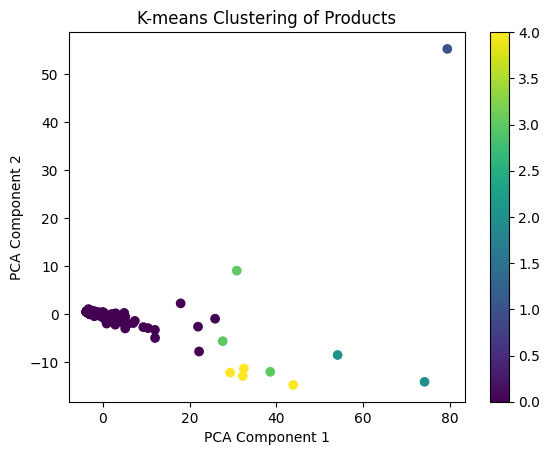

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA로 2차원 축소
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(pivot_scaled)

# 시각화
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=clusters)
plt.title('K-means Clustering of Products')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

In [ ]:
cluster_info = pivot_df[['Cluster']].reset_index()  # 상품명과 클러스터 정보만 가져옴
# '상품명'을 기준으로 merged_data와 클러스터 정보를 병합
merged_with_clusters = pd.merge(merge_data, cluster_info, on='상품명', how='left')
merged_with_clusters['판매일'] = pd.to_datetime(merged_with_clusters['판매일'])

# 병합된 데이터 확인
print(merged_with_clusters)

                       상품명         ADI        CV      category  index  \
0      (CJ)가쓰오우동930g(4인기획)   76.500000  0.433013  Intermittent      0   
1      (CJ)가쓰오우동930g(4인기획)   76.500000  0.433013  Intermittent      1   
2      (CJ)가쓰오우동930g(4인기획)   76.500000  0.433013  Intermittent      2   
3              (CJ)햇당면500g  211.500000  1.551182       erratic      3   
4              (CJ)햇당면500g  211.500000  1.551182       erratic      4   
...                    ...         ...       ...           ...    ...   
12601           소표콩소면1000g   67.777778  0.630718       erratic  12601   
12602         즉석감자납작당면220g   71.333333  0.769800       erratic  12602   
12603         즉석감자납작당면220g   71.333333  0.769800       erratic  12603   
12604         즉석감자납작당면220g   71.333333  0.769800       erratic  12604   
12605         즉석감자납작당면220g   71.333333  0.769800       erratic  12605   

             판매일  판매수량  Cluster  
0     2022-03-31     2        0  
1     2022-05-31     1        0  
2     2022-08-31     

In [ ]:
merged_e0 = merged_with_clusters[(merged_with_clusters['category'] == 'erratic') & (merged_with_clusters['Cluster'] == 0)]

In [ ]:
merged_e0

,상품명,ADI,CV,category,index,판매일,판매수량,Cluster
3,(CJ)햇당면500g,211.500000,1.551182,erratic,3,2022-09-30,2,0
4,(CJ)햇당면500g,211.500000,1.551182,erratic,4,2023-04-30,40,0
5,(CJ)햇당면500g,211.500000,1.551182,erratic,5,2023-11-27,1,0
6,(농심)감자면멀티117g*5,36.551724,0.864090,erratic,6,2021-01-31,8,0
7,(농심)감자면멀티117g*5,36.551724,0.864090,erratic,7,2021-02-28,1,0
...,...,...,...,...,...,...,...,...
12601,소표콩소면1000g,67.777778,0.630718,erratic,12601,2023-01-31,3,0
12602,즉석감자납작당면220g,71.333333,0.769800,erratic,12602,2022-02-28,5,0
12603,즉석감자납작당면220g,71.333333,0.769800,erratic,12603,2022-04-30,5,0
12604,즉석감자납작당면220g,71.333333,0.769800,erratic,12604,2022-08-31,1,0


In [ ]:
'''
# 상품별로 보고 싶을 때 사용

# '상품명'과 'Cluster'별로 주 단위로 그룹화하고 판매수량 합산
weekly_sales = merged_with_clusters.groupby(
    [pd.Grouper(key='판매일', freq='W'), '상품명', 'Cluster']
)['판매수량'].sum().reset_index()
'''

In [ ]:
weekly_sales = merged_e0.groupby(
    pd.Grouper(key='판매일', freq='W')
)['판매수량'].sum().reset_index()

# 결과 확인
print(weekly_sales)

           판매일  판매수량
0   2021-01-31  3849
1   2021-02-07     0
2   2021-02-14     0
3   2021-02-21     0
4   2021-02-28  2631
..         ...   ...
148 2023-12-03   685
149 2023-12-10   894
150 2023-12-17   998
151 2023-12-24   692
152 2023-12-31   644

[153 rows x 2 columns]


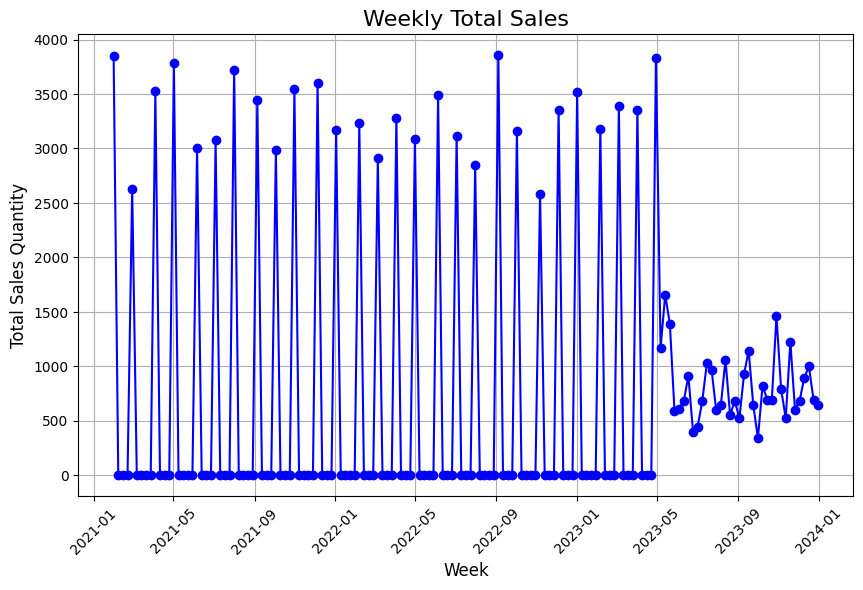

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales['판매일'], weekly_sales['판매수량'], marker='o', linestyle='-', color='b')
plt.title('Weekly Total Sales', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Total Sales Quantity', fontsize=12)
plt.grid(True)

# x축의 라벨이 겹치지 않도록 회전
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

In [ ]:
monthly_sales = weekly_sales.groupby(pd.Grouper(key='판매일', freq='M'))['판매수량'].sum().reset_index()


<ipython-input-44-de1b1b5a6206>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = weekly_sales.groupby(pd.Grouper(key='판매일', freq='M'))['판매수량'].sum().reset_index()


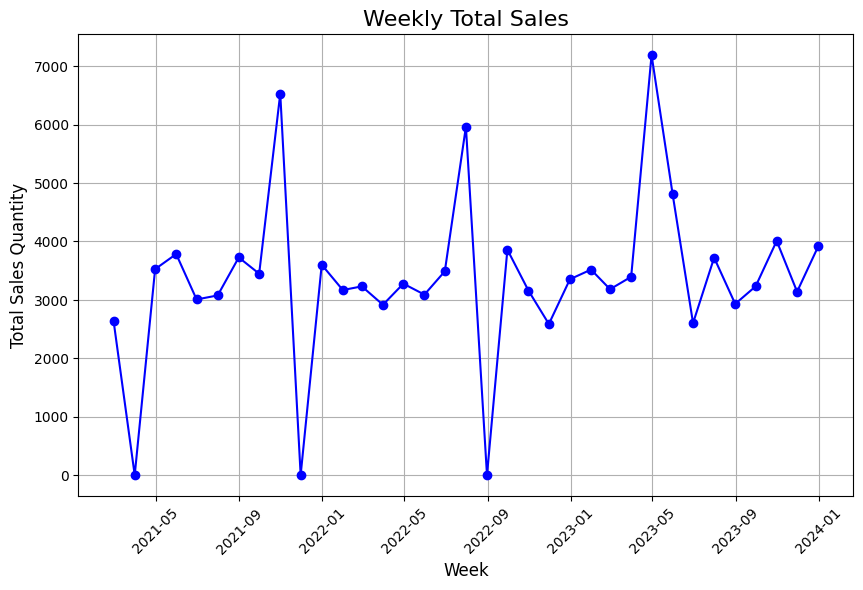

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['판매일'], monthly_sales['판매수량'], marker='o', linestyle='-', color='b')
plt.title('Weekly Total Sales', fontsize=16)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Total Sales Quantity', fontsize=12)
plt.grid(True)

# x축의 라벨이 겹치지 않도록 회전
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

In [ ]:
train_data = monthly_sales[monthly_sales['판매일'] <= '2023-06-30']

# 2023년 6월부터 12월까지의 데이터를 테스트 데이터로 사용
test_data = monthly_sales[(monthly_sales['판매일'] > '2023-06-30') & (monthly_sales['판매일'] <= '2023-12-31')]

In [ ]:
for lag in range(1, 4):
    monthly_sales[f'lag_{lag}'] = monthly_sales['판매수량'].shift(lag)

# 결측치가 있는 행 제거 (lag feature 생성 후 첫 몇 주는 결측치가 생김)
weekly_sales = monthly_sales.dropna()

# 학습 데이터 및 테스트 데이터 다시 정의
train_data = weekly_sales[weekly_sales['판매일'] <= '2023-05-31']
test_data = weekly_sales[(weekly_sales['판매일'] > '2023-05-31') & (weekly_sales['판매일'] <= '2023-12-31')]

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# 학습 및 테스트 데이터에서 특성과 타겟 변수 분리
X_train = train_data[['lag_1', 'lag_2', 'lag_3']]
y_train = train_data['판매수량']

X_test = test_data[['lag_1', 'lag_2', 'lag_3']]
y_test = test_data['판매수량']

# XGBoost DMatrix 생성
train_matrix = xgb.DMatrix(X_train, label=y_train)
test_matrix = xgb.DMatrix(X_test, label=y_test)

# XGBoost 모델 설정
params = {
    'objective': 'reg:squarederror',  # 회귀 문제
    'eval_metric': 'rmse',            # 평가지표: RMSE
    'max_depth': 5,                   # 트리의 최대 깊이
    'learning_rate': 0.1,             # 학습률
    'n_estimators': 100               # 부스팅 반복 횟수
}

# 모델 학습
xgb_model = xgb.train(params, train_matrix, num_boost_round=100)

# 테스트 데이터로 예측
y_pred = xgb_model.predict(test_matrix)

# RMSE 평가
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"테스트 데이터 RMSE: {rmse:.4f}")

테스트 데이터 RMSE: 508.4868


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:30:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<ipython-input-53-90cf5078a314>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['예측값'] = y_pred


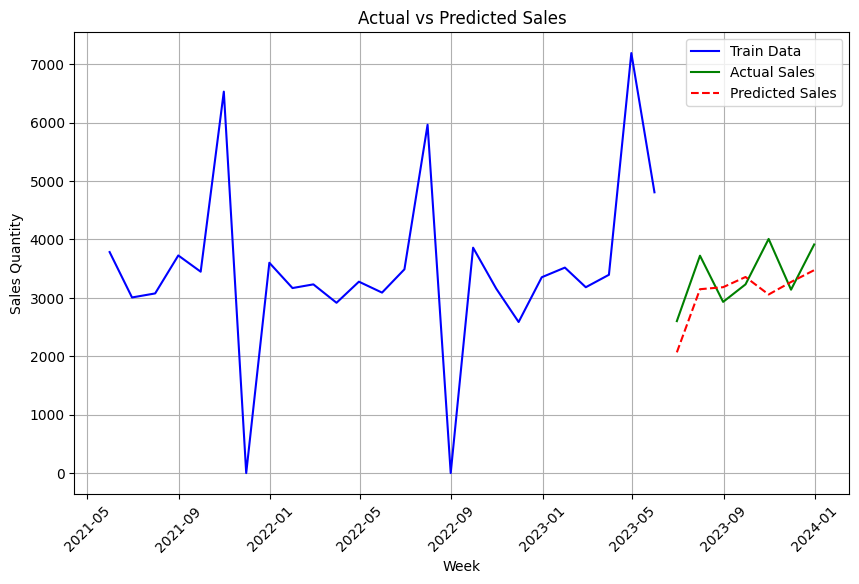

In [ ]:
import matplotlib.pyplot as plt

# 예측 결과와 실제 값을 비교
test_data['예측값'] = y_pred

plt.figure(figsize=(10, 6))
plt.plot(train_data['판매일'], train_data['판매수량'], label='Train Data', color='blue')
plt.plot(test_data['판매일'], test_data['판매수량'], label='Actual Sales', color='green')
plt.plot(test_data['판매일'], test_data['예측값'], label='Predicted Sales', color='red', linestyle='--')

plt.title('Actual vs Predicted Sales')
plt.xlabel('Week')
plt.ylabel('Sales Quantity')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor 모델 설정
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = rf_model.predict(X_test)

# RMSE 평가
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"테스트 데이터 RMSE: {rmse:.4f}")

테스트 데이터 RMSE: 765.0221


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<ipython-input-55-74464fb70527>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['예측값'] = y_pred


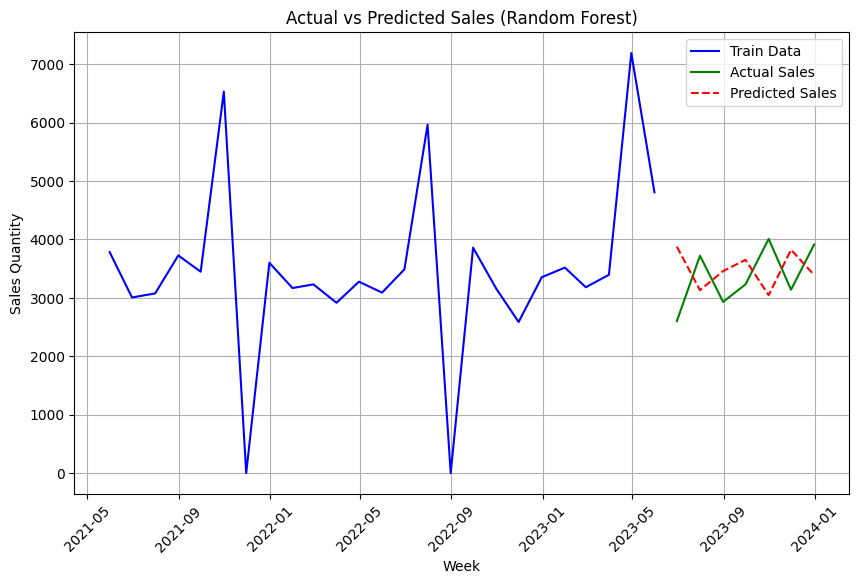

In [ ]:
import matplotlib.pyplot as plt

# 예측 결과와 실제 값을 비교
test_data['예측값'] = y_pred

plt.figure(figsize=(10, 6))
plt.plot(train_data['판매일'], train_data['판매수량'], label='Train Data', color='blue')
plt.plot(test_data['판매일'], test_data['판매수량'], label='Actual Sales', color='green')
plt.plot(test_data['판매일'], test_data['예측값'], label='Predicted Sales', color='red', linestyle='--')

plt.title('Actual vs Predicted Sales (Random Forest)')
plt.xlabel('Week')
plt.ylabel('Sales Quantity')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# 학습 및 테스트 데이터에서 특성과 타겟 변수 분리
X_train = train_data[['lag_1', 'lag_2', 'lag_3']]
y_train = train_data['판매수량']

X_test = test_data[['lag_1', 'lag_2', 'lag_3']]
y_test = test_data['판매수량']

# AdaBoost 모델 설정
adaboost_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=5),  # 기본 학습기 설정 (트리 깊이 5)
    n_estimators=100,        # 부스팅 반복 횟수
    learning_rate=0.1,       # 학습률
    random_state=42          # 재현성을 위한 랜덤 시드
)

# 모델 학습
adaboost_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = adaboost_model.predict(X_test)

# RMSE 평가
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"테스트 데이터 RMSE: {rmse:.4f}")

테스트 데이터 RMSE: 543.0962


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<ipython-input-60-e72dba0b57fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['예측값'] = y_pred


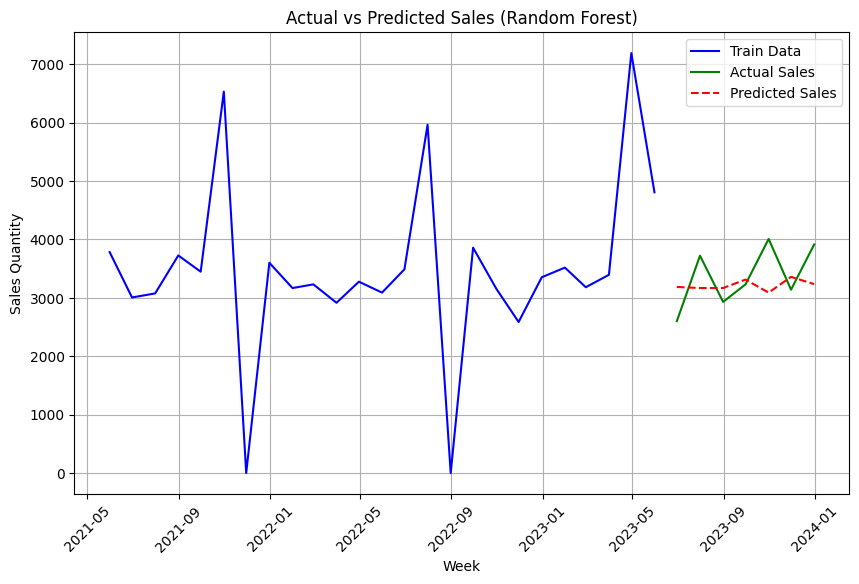

In [ ]:
test_data['예측값'] = y_pred

plt.figure(figsize=(10, 6))
plt.plot(train_data['판매일'], train_data['판매수량'], label='Train Data', color='blue')
plt.plot(test_data['판매일'], test_data['판매수량'], label='Actual Sales', color='green')
plt.plot(test_data['판매일'], test_data['예측값'], label='Predicted Sales', color='red', linestyle='--')

plt.title('Actual vs Predicted Sales (Random Forest)')
plt.xlabel('Week')
plt.ylabel('Sales Quantity')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.9 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

# SARIMA 모델 학습
sarima_model = auto_arima(train_data['판매수량'],
                          seasonal=True,
                          m=52,  # 주별 데이터를 다루기 때문에 52주(1년 주기)
                          trace=True,
                          suppress_warnings=True)

# 모델 요약 출력
print(sarima_model.summary())

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
# 2023년 6월부터 12월까지 예측
forecast = sarima_model.predict(n_periods=len(test_data))

# 예측 결과를 테스트 데이터와 비교하기 위해 데이터프레임에 추가
test_data['예측값'] = forecast

print(test_data)

           판매일  판매수량   lag_1   lag_2   lag_3     예측값
125 2023-06-04  3982  3481.0  3497.0  4054.0  3764.5
126 2023-06-11  3586  3982.0  3481.0  3497.0  3764.5
127 2023-06-18  3983  3586.0  3982.0  3481.0  3764.5
128 2023-06-25  3382  3983.0  3586.0  3982.0  3764.5
129 2023-07-02  3098  3382.0  3983.0  3586.0  3764.5
130 2023-07-09  3374  3098.0  3382.0  3983.0  3764.5
131 2023-07-16  5056  3374.0  3098.0  3382.0  3764.5
132 2023-07-23  4501  5056.0  3374.0  3098.0  3764.5
133 2023-07-30  3476  4501.0  5056.0  3374.0  3764.5
134 2023-08-06  4036  3476.0  4501.0  5056.0  3764.5
135 2023-08-13  3776  4036.0  3476.0  4501.0  3764.5
136 2023-08-20  3918  3776.0  4036.0  3476.0  3764.5
137 2023-08-27  3830  3918.0  3776.0  4036.0  3764.5
138 2023-09-03  3422  3830.0  3918.0  3776.0  3764.5
139 2023-09-10  3812  3422.0  3830.0  3918.0  3764.5
140 2023-09-17  3750  3812.0  3422.0  3830.0  3764.5
141 2023-09-24  4721  3750.0  3812.0  3422.0  3764.5
142 2023-10-01  3841  4721.0  3750.0  3812.0  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
<ipython-input-190-bf1b93c7a697>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['예측값'] = forecast


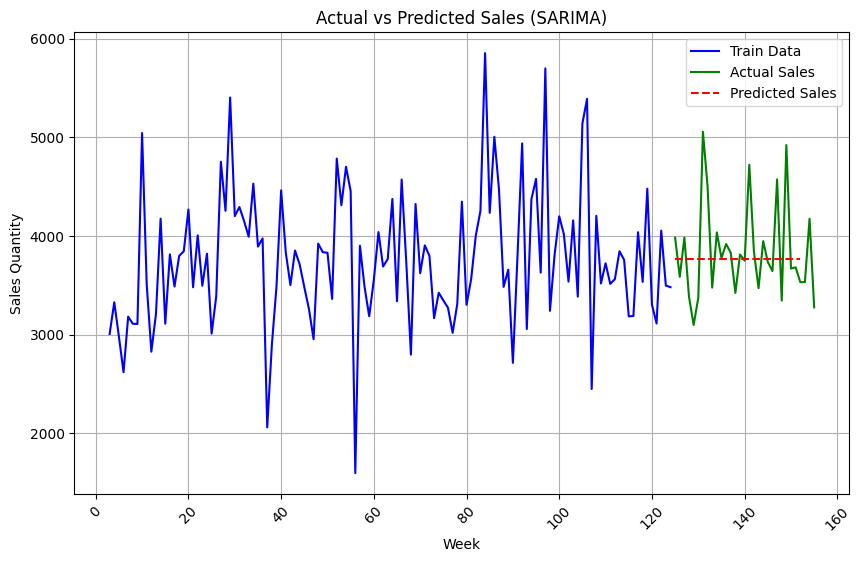

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['판매수량'], label='Train Data', color='blue')
plt.plot(test_data.index, test_data['판매수량'], label='Actual Sales', color='green')
plt.plot(test_data.index, test_data['예측값'], label='Predicted Sales', color='red', linestyle='--')

plt.title('Actual vs Predicted Sales (SARIMA)')
plt.xlabel('Week')
plt.ylabel('Sales Quantity')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error


# NaN 값이 있는 행을 제거
test_data_cleaned = test_data.dropna()

# RMSE 계산
rmse = mean_squared_error(test_data_cleaned['판매수량'], test_data_cleaned['예측값'], squared=False)
print(f"테스트 데이터 RMSE: {rmse:.4f}")

테스트 데이터 RMSE: 488.3532


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
